In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import glob

import seaborn as sns
from matplotlib.colors import LogNorm, Normalize
import astropy.units as u
from astropy.cosmology import Planck18, z_at_value

In [5]:
import matplotlib

font = {'family' : 'serif',
        'size'   : 16}

matplotlib.rc('font', **font)


In [6]:
plotdir = 'mtot_q_grid_hm_plots/'

In [7]:
mtots = [10, 20, 30, 40, 50, 60, 80]

DLs=[1000]

Mc_files = []
for mtot in mtots:
    Mc_files.append('mtot_q_grids_xhm_vs_hm/mtot_'+str(mtot)+'_Mc_grid_DL_1000.csv')
print(Mc_files)

eta_files = []
for mtot in mtots:
    eta_files.append('mtot_q_grids_xhm_vs_hm/mtot_'+str(mtot)+'_eta_grid_DL_1000.csv')
print(eta_files)



df1 = pd.DataFrame()
for fi in Mc_files:
    df_temp = pd.read_csv(fi)
    df1 = df1.append(df_temp)
# drop the zero rows that resulted from NoneType Networks
df1 = df1.loc[~(df1==0).all(axis=1)]

df2 = pd.DataFrame()
for fi in eta_files:
    df_temp = pd.read_csv(fi)
    df2 = df2.append(df_temp)
# drop the zero rows that resulted from NoneType Networks
df2 = df2.loc[~(df2==0).all(axis=1)]

['mtot_q_grids_xhm_vs_hm/mtot_10_Mc_grid_DL_1000.csv', 'mtot_q_grids_xhm_vs_hm/mtot_20_Mc_grid_DL_1000.csv', 'mtot_q_grids_xhm_vs_hm/mtot_30_Mc_grid_DL_1000.csv', 'mtot_q_grids_xhm_vs_hm/mtot_40_Mc_grid_DL_1000.csv', 'mtot_q_grids_xhm_vs_hm/mtot_50_Mc_grid_DL_1000.csv', 'mtot_q_grids_xhm_vs_hm/mtot_60_Mc_grid_DL_1000.csv', 'mtot_q_grids_xhm_vs_hm/mtot_80_Mc_grid_DL_1000.csv']
['mtot_q_grids_xhm_vs_hm/mtot_10_eta_grid_DL_1000.csv', 'mtot_q_grids_xhm_vs_hm/mtot_20_eta_grid_DL_1000.csv', 'mtot_q_grids_xhm_vs_hm/mtot_30_eta_grid_DL_1000.csv', 'mtot_q_grids_xhm_vs_hm/mtot_40_eta_grid_DL_1000.csv', 'mtot_q_grids_xhm_vs_hm/mtot_50_eta_grid_DL_1000.csv', 'mtot_q_grids_xhm_vs_hm/mtot_60_eta_grid_DL_1000.csv', 'mtot_q_grids_xhm_vs_hm/mtot_80_eta_grid_DL_1000.csv']


In [8]:
cols_to_use = df2.columns.difference(df1.columns)

df = df1.copy()
for col_to_use in cols_to_use:
    df[col_to_use] = df2[col_to_use].values

    
# df = pd.merge(df1, df2[cols_to_use], left_index=True, right_index=True, how='outer')

df

,Mc,eta,DL,z,m1,m2,M_tot,q,full_faith,snr,...,Mc_min_faith,Mc_max_lam_index_first,full_inner_prod,Mc_min_inner_prod,eta_full_bias,eta_max_lam,eta_max_lam_index_first,eta_min_faith,eta_min_inner_prod,eta_stat_err
0,0.000000,0.000000,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1,0.000000,0.000000,0.000000,0.000000,1,0.000000,0.000000,0.000000
1,5.213734,0.249994,1000.0,0.19782,6.019195,5.959003,11.978198,1.010101,0.998512,177.094302,...,0.999793,1,0.967885,0.999770,0.000533,0.004374,1,0.999818,0.999798,0.000050
2,0.000000,0.000000,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1,0.000000,0.000000,0.000000,0.000000,1,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1,0.000000,0.000000,0.000000,0.000000,1,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1,0.000000,0.000000,0.000000,0.000000,1,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,41.709876,0.249994,1000.0,0.19782,48.153559,47.672024,95.825583,1.010101,0.989220,891.203882,...,0.999998,1,0.681058,0.999998,0.000583,0.049861,1,0.997783,0.997637,0.000007
236,35.796637,0.193762,1000.0,0.19782,70.637461,25.188122,95.825583,2.804396,0.926008,759.961701,...,0.999997,1,0.668494,0.999996,0.012922,0.004082,1,0.999987,0.999985,0.000056
237,30.107249,0.145205,1000.0,0.19782,78.933449,16.892135,95.825583,4.672793,0.871514,635.153597,...,0.999936,1,0.651212,0.999935,0.005476,0.033241,1,0.999285,0.999271,0.000034
238,0.000000,0.000000,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1,0.000000,0.000000,0.000000,0.000000,1,0.000000,0.000000,0.000000


In [9]:
# drop the zero rows that resulted from NoneType Networks
# df = df.loc[~(df==0).all(axis=1)]
df = df[df["Mc"] > 0]

# df = df[df["q"] < 7]

# # Compute redshifts based on Planck18 cosmology
# zs = np.zeros(len(df["DL"]))
# for i, dl in enumerate(df["DL"]):
#     zs[i] = z_at_value(Planck18.luminosity_distance, dl * u.Mpc)

# Compute m1, m2 for plots
# mass1 = (df["q"]**(2./5.))*((1.0 + df["q"])**(1./5.))*df["Mc"]
# mass2 = (df["q"]**(-3./5.))*((1.0 + df["q"])**(1./5.))*df["Mc"]


print("Total number of events:",len(df))

# Separate data into unbiased and unfaithful
Mc_unbiased_mask = np.abs(df["Mc_full_bias"])/df["Mc_stat_err"] < 1.0
eta_unbiased_mask = np.abs(df["eta_full_bias"])/df["eta_stat_err"] < 1.0

faith_mask = np.abs(df["full_faith"]) > (df["Mc_min_faith"])

print("Total number of events:",len(df))
print("Total number of events with unbiased Mc:", np.sum(Mc_unbiased_mask))
print("Total number of events with faithfulness above calculated threshold:", np.sum(faith_mask))
print("Overlap between bias and faithfulness criteria:", len(df[Mc_unbiased_mask*faith_mask]))

df

Total number of events: 1089
Total number of events: 1089
Total number of events with unbiased Mc: 0
Total number of events with faithfulness above calculated threshold: 0
Overlap between bias and faithfulness criteria: 0


,Mc,eta,DL,z,m1,m2,M_tot,q,full_faith,snr,...,Mc_min_faith,Mc_max_lam_index_first,full_inner_prod,Mc_min_inner_prod,eta_full_bias,eta_max_lam,eta_max_lam_index_first,eta_min_faith,eta_min_inner_prod,eta_stat_err
1,5.213734,0.249994,1000.0,0.19782,6.019195,5.959003,11.978198,1.010101,0.998512,177.094302,...,0.999793,1,0.967885,0.999770,0.000533,0.004374,1,0.999818,0.999798,0.000050
6,5.213734,0.249994,1000.0,0.19782,6.019195,5.959003,11.978198,1.010101,0.998512,177.094302,...,0.999793,1,0.967885,0.999770,0.000533,0.004374,1,0.999818,0.999798,0.000050
8,5.008347,0.233797,1000.0,0.19782,7.513834,4.464364,11.978198,1.683069,0.994863,170.932749,...,0.997323,1,0.964829,0.996897,0.000945,0.005249,1,0.999812,0.999782,0.000074
10,4.474580,0.193762,1000.0,0.19782,8.829683,3.148515,11.978198,2.804396,0.984879,155.574126,...,0.999823,1,0.957224,0.999826,0.000586,0.002624,1,0.999882,0.999883,0.000058
11,5.213734,0.249994,1000.0,0.19782,6.019195,5.959003,11.978198,1.010101,0.998512,177.094302,...,0.999793,1,0.967885,0.999770,0.000533,0.004374,1,0.999818,0.999798,0.000050
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
231,40.066776,0.233797,1000.0,0.19782,60.110674,35.714909,95.825583,1.683069,0.975811,853.029937,...,0.990424,1,0.655327,0.990507,0.017672,0.083102,1,0.994318,0.994367,0.000080
235,41.709876,0.249994,1000.0,0.19782,48.153559,47.672024,95.825583,1.010101,0.989220,891.203882,...,0.999998,1,0.681058,0.999998,0.000583,0.049861,1,0.997783,0.997637,0.000007
236,35.796637,0.193762,1000.0,0.19782,70.637461,25.188122,95.825583,2.804396,0.926008,759.961701,...,0.999997,1,0.668494,0.999996,0.012922,0.004082,1,0.999987,0.999985,0.000056
237,30.107249,0.145205,1000.0,0.19782,78.933449,16.892135,95.825583,4.672793,0.871514,635.153597,...,0.999936,1,0.651212,0.999935,0.005476,0.033241,1,0.999285,0.999271,0.000034


In [10]:
def plot_bias_features(x, y, feature, show_unbiased=False, mtot=None, qmax=None, colormap='RdBu_r',\
        xlabel="Mc ($M_\odot$)", ylabel="$\eta", cbar_label="Faithfulness",\
        title="Minimum Faithfulness required \nfor unbiased Mc", xlim=None, ylim=None, plt_show=True, savefig=None,\
            unbiased_mask=Mc_unbiased_mask, **kwargs):
    
    mask = np.ones(len(df["Mc"]), dtype=bool)
    z = df["z"].iloc[0]
    if mtot is not None:
        mtot = mtot*(1+z)
        mask = mask * (df["M_tot"] > (mtot-1)) * (df["M_tot"] < (mtot+1)) 
        title = title + " (M_tot=" + str(np.round(mtot,2)) + " $M_\odot$)"

    if qmax is not None:
        mask = mask * (df["q"] < qmax) 
        title = title + " (q < " + str(np.round(qmax,2)) + ")"
    
    x = x[mask]
    y = y[mask]
    feature = feature[mask]

    fig, ax = plt.subplots(figsize=(8, 6))
    cm = plt.cm.get_cmap(colormap)

    sc = plt.scatter(x, y, c=feature, cmap=cm, **kwargs)
    cbar = plt.colorbar(sc)
    cbar.set_label(cbar_label)

    if show_unbiased:
        unbiased_mask = unbiased_mask[mask]
        plt.scatter(x[unbiased_mask], y[unbiased_mask], c="white",  s=100, edgecolors='g', lw=3, label='Unbiased')
        plt.legend()

    if xlim:
        plt.xlim(xlim)
    if ylim:
        plt.ylim(ylim)
        
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)

    plt.tight_layout()

    # if savefig is not None:
    #     plt.savefig(plotdir+savefig+'.pdf')
    if plt_show:
        plt.show()


# Overall Population

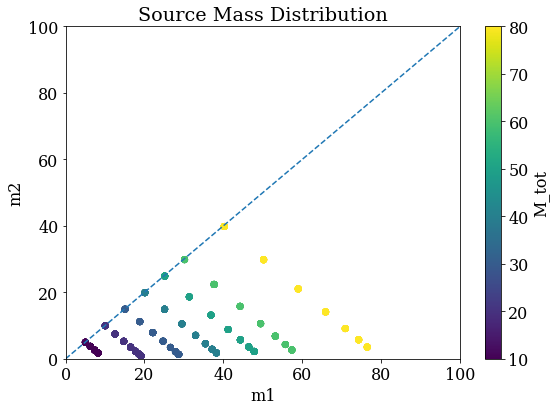

In [12]:
# Mass Distribution
plot_bias_features(df["m1"]/(1+df["z"]), df["m2"]/(1+df["z"]), df["M_tot"]/(1+df["z"]), colormap="viridis", mtot=None,\
    title="Source Mass Distribution", xlabel="m1", ylabel="m2", cbar_label="M_tot", plt_show=False, savefig='mass_dist')
mmax = 100
plt.xlim(0, mmax)
plt.ylim(0, mmax)
x=np.linspace(0, mmax, 10)
plt.plot(x, x, '--')


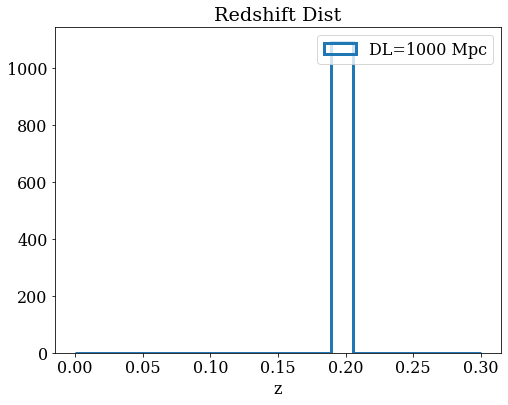

In [13]:
# Redshift Distribution
fig, ax = plt.subplots(figsize=(8, 6))
bins = np.linspace(0, 0.30, 20)
for DL in DLs:
    distance_mask = df["DL"] == DL
    plt.hist(df["z"][distance_mask], bins, histtype='step', lw=3, label=f"DL={DL} Mpc")

plt.xlabel("z")
plt.ylabel("")
plt.legend()
plt.title("Redshift Dist")
plt.show()

In [14]:
df["z"].iloc[0]

0.1978197924849624

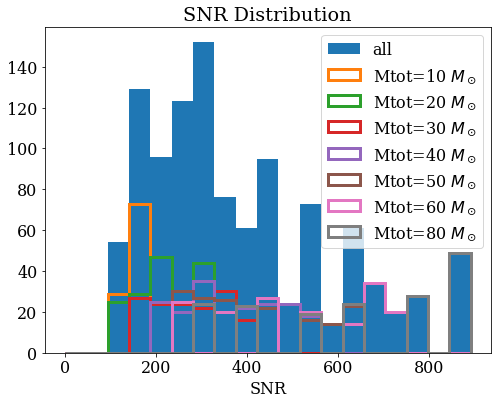

In [16]:
# SNR Distribution
fig, ax = plt.subplots(figsize=(8, 6))

bins = np.linspace(0, np.max(df["snr"]), 20)

plt.hist(df["snr"], bins, label="all")

z = df["z"].iloc[0]

for mtot in mtots:
    mask = (df["M_tot"] < mtot*(1.1+ z)) * (df["M_tot"]> mtot*(0.9+ z)) 
    plt.hist(df["snr"][mask], bins, histtype='step', lw=3, label=f"Mtot={mtot} $M_\odot$")

plt.xlabel("SNR")
plt.ylabel("")
plt.legend(loc='upper right')
plt.title("SNR Distribution")

# plt.savefig(plotdir + 'snr_dist.pdf')
plt.show()

# Features

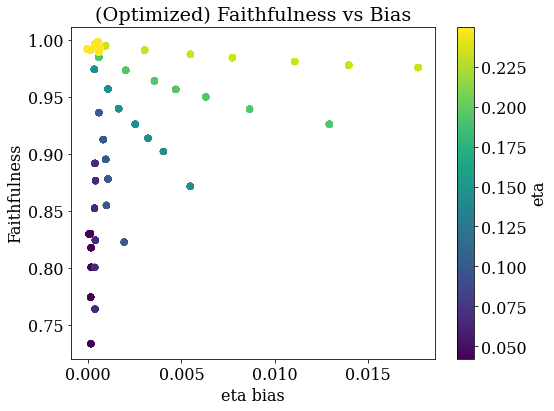

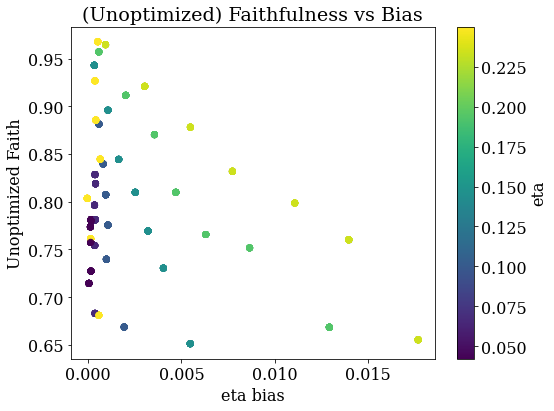

In [17]:
plot_bias_features(df["eta_full_bias"], df["full_faith"], df["eta"], mtot=None, colormap="viridis", 
    title="(Optimized) Faithfulness vs Bias", xlabel="eta bias", ylabel="Faithfulness", cbar_label="eta", plt_show=False)


plot_bias_features(df["eta_full_bias"], df["full_inner_prod"], df["eta"], mtot=None, colormap="viridis", 
    title="(Unoptimized) Faithfulness vs Bias", xlabel="eta bias", ylabel="Unoptimized Faith", cbar_label="eta", plt_show=False)

# plt.semilogx()

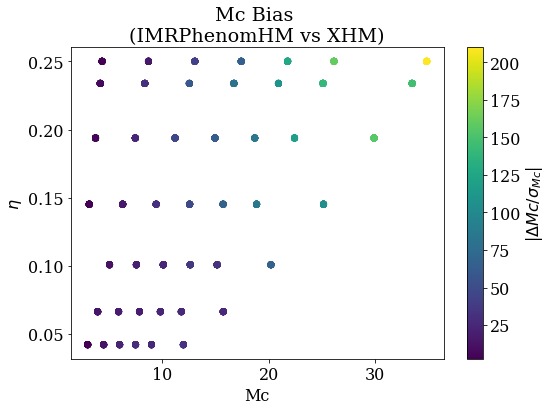

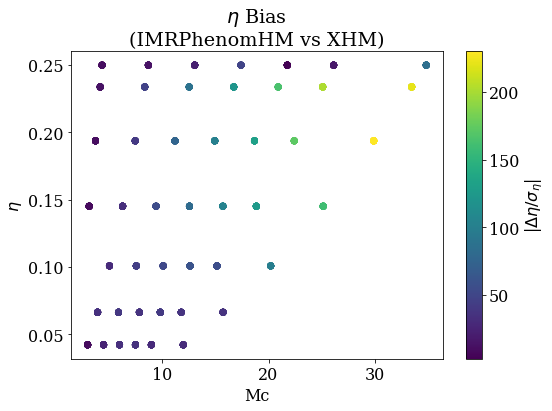

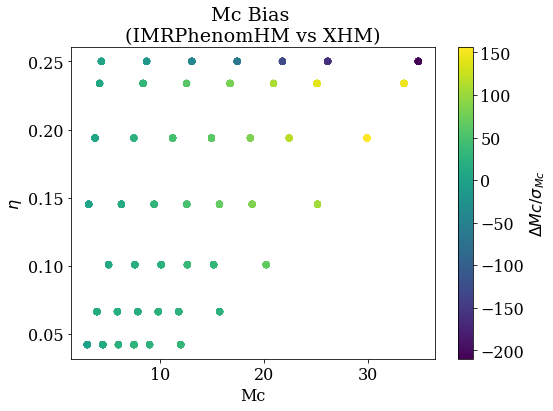

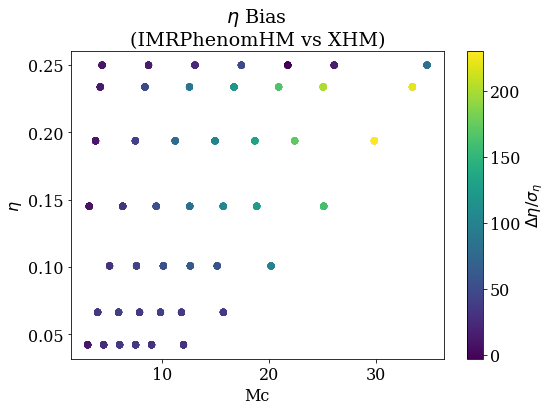

In [37]:
plot_bias_features(df["Mc"]/(1+df["z"]), df["eta"], np.abs(df["Mc_full_bias"]/df["Mc_stat_err"]), mtot=None, colormap="viridis", 
    title="Mc Bias \n(IMRPhenomHM vs XHM)", xlabel="Mc", ylabel="$\eta$", cbar_label="|$\Delta Mc / \sigma_{Mc}$|")

plot_bias_features(df["Mc"]/(1+df["z"]), df["eta"], np.abs(df["eta_full_bias"]/df["eta_stat_err"]), mtot=None, colormap="viridis", 
    title="$\eta$ Bias \n(IMRPhenomHM vs XHM)", xlabel="Mc", ylabel="$\eta$", cbar_label="|$\Delta \eta / \sigma_{\eta}$|")


plot_bias_features(df["Mc"]/(1+df["z"]), df["eta"], (df["Mc_full_bias"]/df["Mc_stat_err"]), mtot=None, colormap="viridis", 
    title="Mc Bias \n(IMRPhenomHM vs XHM)", xlabel="Mc", ylabel="$\eta$", cbar_label="$\Delta Mc / \sigma_{Mc}$")

plot_bias_features(df["Mc"]/(1+df["z"]), df["eta"], (df["eta_full_bias"]/df["eta_stat_err"]), mtot=None, colormap="viridis", 
    title="$\eta$ Bias \n(IMRPhenomHM vs XHM)", xlabel="Mc", ylabel="$\eta$", cbar_label="$\Delta \eta / \sigma_{\eta}$")

## In general, increasing Mc or eta == increasing bias

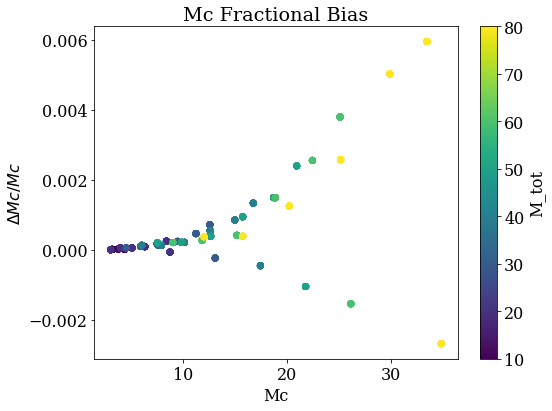

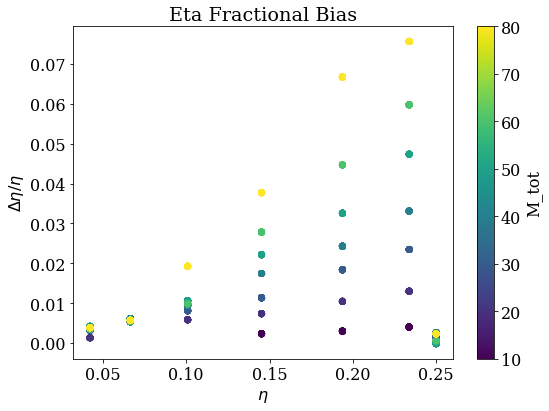

In [24]:
plot_bias_features(df["Mc"]/(1+df["z"]), df["Mc_full_bias"]/df["Mc"], df["M_tot"]/(1+df["z"]), mtot=None, colormap="viridis", 
    title="Mc Fractional Bias", xlabel="Mc", ylabel="$\Delta Mc / Mc$", cbar_label="M_tot", savefig='mc_frac_bias')

plot_bias_features(df["eta"], df["eta_full_bias"]/df["eta"], df["M_tot"]/(1+df["z"]), mtot=None, colormap="viridis", 
    title="Eta Fractional Bias", xlabel="$\eta$", ylabel="$\Delta \eta / \eta$", cbar_label="M_tot", plt_show=False, savefig='eta_frac_bias')


Also, this bias is statistically significant given the small errors in 3G detectors.

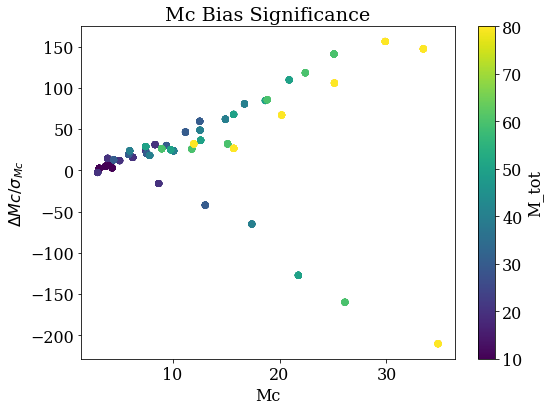

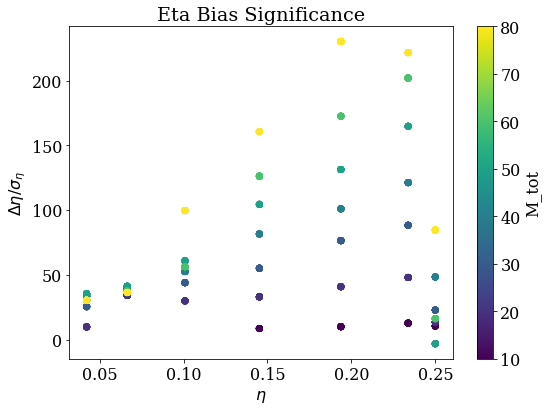

In [25]:
plot_bias_features(df["Mc"]/(1+df["z"]), df["Mc_full_bias"]/df["Mc_stat_err"], df["M_tot"]/(1+df["z"]), mtot=None, colormap="viridis", 
    title="Mc Bias Significance", xlabel="Mc", ylabel="$\Delta Mc / \sigma_{Mc}$", cbar_label="M_tot", savefig='mc_bias_significance')

plot_bias_features(df["eta"], df["eta_full_bias"]/df["eta_stat_err"], df["M_tot"]/(1+df["z"]), mtot=None, colormap="viridis", 
    title="Eta Bias Significance", xlabel="$\eta$", ylabel="$\Delta \eta / \sigma_\eta$", cbar_label="M_tot", plt_show=False, savefig='eta_bias_significance')


## Higher Mc, eta == lesser time in band

Larger total mass and more unequal mass ratios increase the inspiral time.

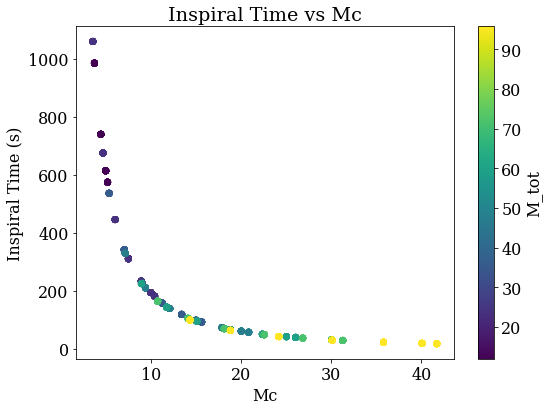

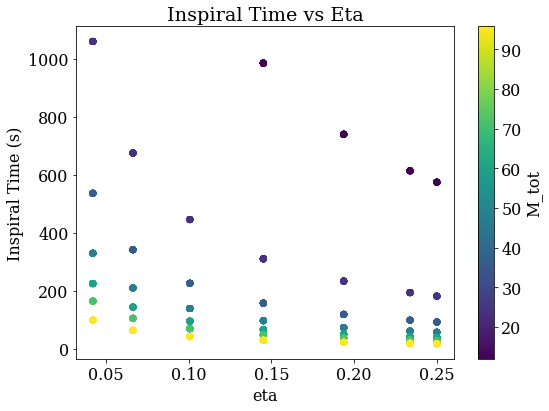

In [26]:
plot_bias_features(df["Mc"], df["inspiral_t"], df["M_tot"], mtot=None, colormap="viridis", 
    title="Inspiral Time vs Mc", xlabel="Mc", ylabel="Inspiral Time (s)", cbar_label="M_tot")

plot_bias_features(df["eta"], df["inspiral_t"], df["M_tot"], mtot=None, colormap="viridis", 
    title="Inspiral Time vs Eta", xlabel="eta", ylabel="Inspiral Time (s)", cbar_label="M_tot", plt_show=False)


## Therefore, events that spend lesser time in band == experience more bias

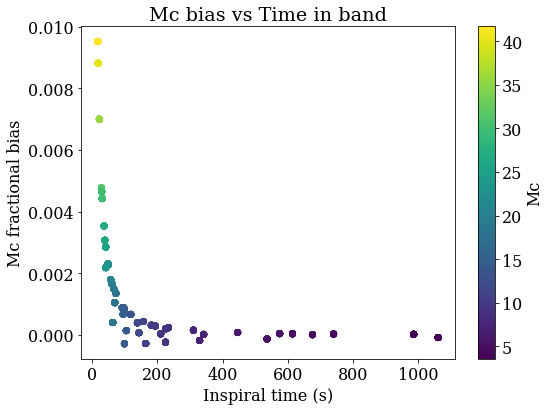

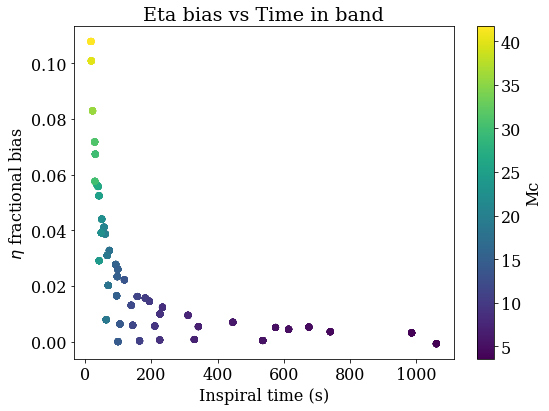

In [39]:
plot_bias_features(df["inspiral_t"], df["Mc_full_bias"]/df["Mc"], df["Mc"], mtot=None, colormap="viridis", 
    title="Mc bias vs Time in band", xlabel="Inspiral time (s)", ylabel="Mc fractional bias", cbar_label="Mc", plt_show=False)
# plt.loglog()

plot_bias_features(df["inspiral_t"], df["eta_full_bias"]/df["eta"], df["Mc"], mtot=None, colormap="viridis", 
    title="Eta bias vs Time in band", xlabel="Inspiral time (s)", ylabel="$\eta$ fractional bias", cbar_label="Mc", plt_show=False)
# plt.loglog()


Longer inspiral times allow for more cycles, and so the waveform can be calibrated better.

We can put this all together in a nice plot:

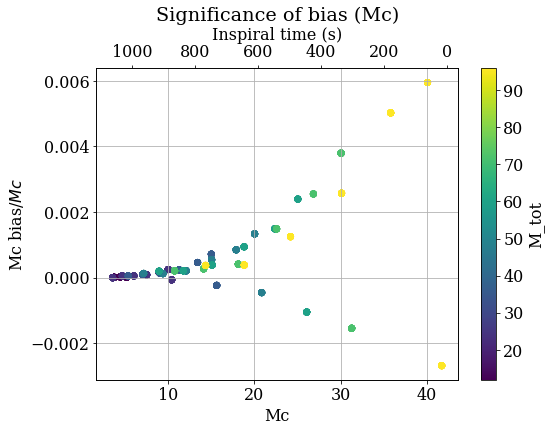

In [27]:
x1 = df["Mc"]
xlabel1 = "Mc"

x2 = df["inspiral_t"]
xlabel2="Inspiral time (s)"

y = df["Mc_full_bias"]/df["Mc"]
ylabel="Mc bias/$Mc$"

title="Significance of bias (Mc)"

c = df["M_tot"]
cbar_label="M_tot"

# c = df["q"]
# cbar_label="q"
    
fig, ax1 = plt.subplots(figsize=(8,6))
ax2 = ax1.twiny()

sc = ax1.scatter(x1, y, c=c, cmap='viridis')
cbar = plt.colorbar(sc)
cbar.set_label(cbar_label)

ax2.scatter(x2, y, color='g', alpha=0)

ax1.set_xlabel(xlabel1)
ax2.set_xlabel(xlabel2)

ax1.set_ylabel(ylabel)
ax2.invert_xaxis()

ax1.grid(which='both')

plt.tight_layout()
plt.title(title)
plt.show()


The diagonal line is at q=1, and the mass ratios become more extreme for lower points.

## For a given q, the lower the faithfulness, the larger the bias

In [41]:
# q_range = np.linspace(1, 6, 6)
q_range = np.unique(np.round(df["q"], 3))
# q_range = q_range[:5]
q_range

array([ 1.01 ,  1.683,  2.804,  4.673,  7.786, 12.973, 21.617])

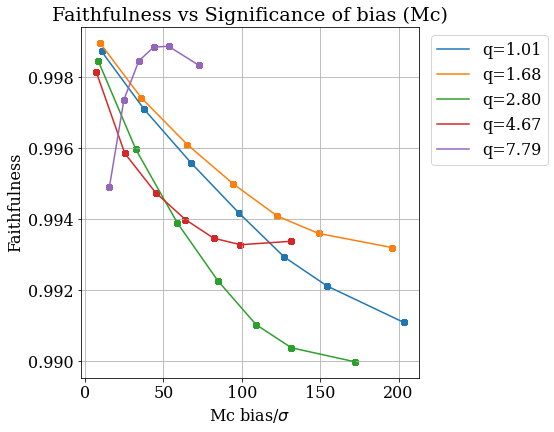

In [42]:
x = df["Mc_full_bias"]/df["Mc_stat_err"]
xlabel="Mc bias/$\sigma$"

y = df["full_faith"]
ylabel="Faithfulness"

title="Faithfulness vs Significance of bias (Mc)"
    
fig, ax1 = plt.subplots(figsize=(8,6))

for q in q_range[:5]:
    mask_q = (df["q"]< 1.01*q) * (df["q"]>0.99*q)
    ax1.scatter(x[mask_q], y[mask_q])
    ax1.plot(x[mask_q], y[mask_q], label=f"q={q:.2f}")

ax1.set_xlabel(xlabel)
ax1.set_ylabel(ylabel)

ax1.grid(which='both')

# plt.semilogx()
plt.legend(bbox_to_anchor=(1.01, 1), loc='upper left', ncol=1)
plt.tight_layout()
plt.title(title)
plt.show()

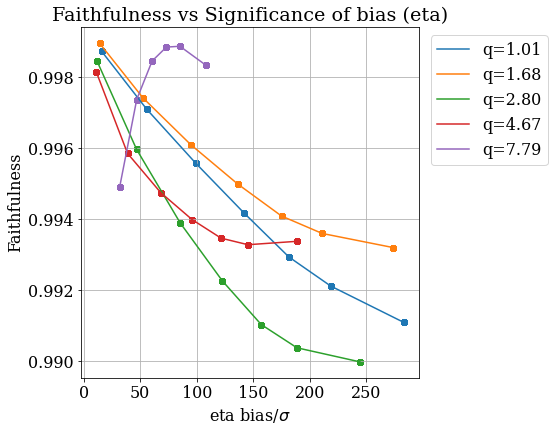

In [43]:
x = df["eta_full_bias"]/df["eta_stat_err"]
xlabel="eta bias/$\sigma$"

y = df["full_faith"]
ylabel="Faithfulness"

title="Faithfulness vs Significance of bias (eta)"
    
fig, ax1 = plt.subplots(figsize=(8,6))

for q in q_range[:5]:
    mask_q = (df["q"]< 1.01*q) * (df["q"]>0.99*q)
    ax1.scatter(x[mask_q], y[mask_q])
    ax1.plot(x[mask_q], y[mask_q], label=f"q={q:.2f}")

ax1.set_xlabel(xlabel)
ax1.set_ylabel(ylabel)

ax1.grid(which='both')
# plt.semilogx()
plt.legend(bbox_to_anchor=(1.01, 1), loc='upper left', ncol=1)
plt.tight_layout()
plt.title(title)
plt.show()

This relationship becomes cagey for q > ~6 though.

## The higher the Chirp Mass, the stricter we expect the requirements on Waveform accuracy should be.

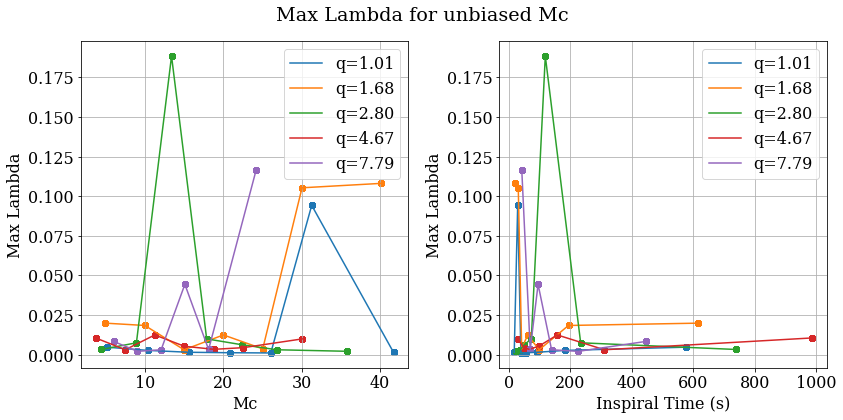

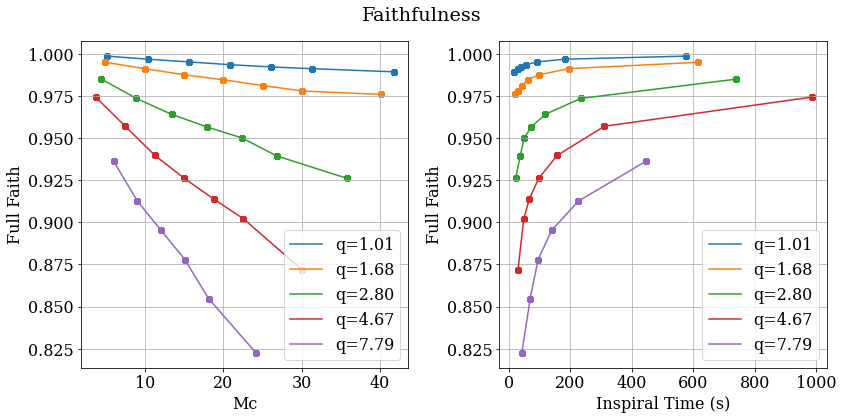

In [29]:
# q_range = np.linspace(1, 6, 6)
q_range = np.unique(np.round(df["q"], 3))
# q_range = q_range[:5]

# Sanity check that lambda is being tuned properly

x1 = df["Mc"]
xlabel1="Mc"

x2 = df["inspiral_t"]
xlabel2="Inspiral Time (s)"

y = df["Mc_max_lam"]
ylabel="Max Lambda"

title="Max Lambda for unbiased Mc"
    
fig, [ax1, ax2] = plt.subplots(nrows=1, ncols=2, figsize=(12,6))

for q in q_range[:5]:
    mask_q = (df["q"]< 1.01*q) * (df["q"]>0.99*q)
    ax1.scatter(x1[mask_q], y[mask_q])
    ax1.plot(x1[mask_q], y[mask_q], label=f"q={q:.2f}")

    ax2.scatter(x2[mask_q], y[mask_q])
    ax2.plot(x2[mask_q], y[mask_q], label=f"q={q:.2f}")

    
ax1.set_xlabel(xlabel1)
ax1.set_ylabel(ylabel)
ax1.grid(which='both')
ax1.legend()

ax2.set_xlabel(xlabel2)
ax2.set_ylabel(ylabel)
ax2.grid(which='both')
ax2.legend()
# ax2.invert_xaxis()


plt.tight_layout()
plt.suptitle(title)
plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()


# Sanity check that lambda is being tuned properly

x1 = df["Mc"]
xlabel1="Mc"

x2 = df["inspiral_t"]
xlabel2="Inspiral Time (s)"

y = df["full_faith"]
ylabel="Full Faith"

title="Faithfulness"
    
fig, [ax1, ax2] = plt.subplots(nrows=1, ncols=2, figsize=(12,6))

for q in q_range[:5]:
    mask_q = (df["q"]< 1.01*q) * (df["q"]>0.99*q)
    ax1.scatter(x1[mask_q], y[mask_q])
    ax1.plot(x1[mask_q], y[mask_q], label=f"q={q:.2f}")

    ax2.scatter(x2[mask_q], y[mask_q])
    ax2.plot(x2[mask_q], y[mask_q], label=f"q={q:.2f}")

    
ax1.set_xlabel(xlabel1)
ax1.set_ylabel(ylabel)
ax1.grid(which='both')
ax1.legend()

ax2.set_xlabel(xlabel2)
ax2.set_ylabel(ylabel)
ax2.grid(which='both')
ax2.legend()
# ax2.invert_xaxis()


plt.tight_layout()
plt.suptitle(title)
plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()

Indeed, we see that for events where IMRPhenomXAS and IMRPhenomD agree well (high faithfulness), the maximum allowed lambda is quite large. When the faithfulness is lower, the lambda requirements are stricter.

# The Min Faithfulness/ lambda debacle

However, lambda does not correlate well with faithfulness. The minimum faithfulness calculated for the same values of lambda is non-monotonic.

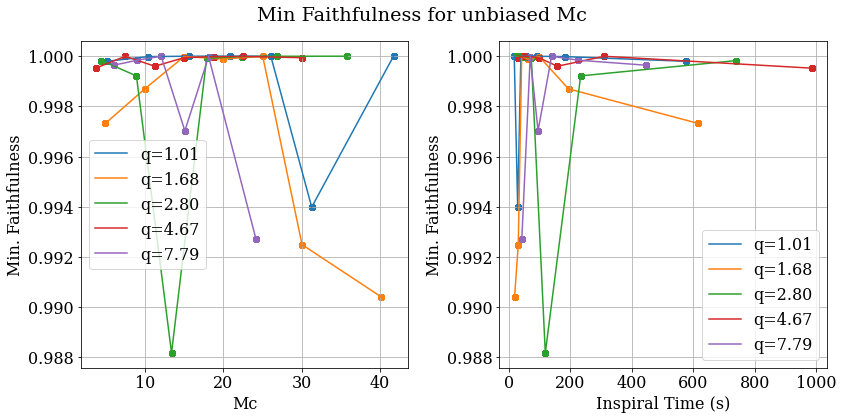

In [30]:
x1 = df["Mc"]
xlabel1="Mc"

x2 = df["inspiral_t"]
xlabel2="Inspiral Time (s)"

y = df["Mc_min_faith"]
ylabel="Min. Faithfulness"

title="Min Faithfulness for unbiased Mc"
    
fig, [ax1, ax2] = plt.subplots(nrows=1, ncols=2, figsize=(12,6))

for q in q_range[:5]:
    mask_q = (df["q"]< 1.01*q) * (df["q"]>0.99*q)
    ax1.scatter(x1[mask_q], y[mask_q])
    ax1.plot(x1[mask_q], y[mask_q], label=f"q={q:.2f}")

    ax2.scatter(x2[mask_q], y[mask_q])
    ax2.plot(x2[mask_q], y[mask_q], label=f"q={q:.2f}")

    
ax1.set_xlabel(xlabel1)
ax1.set_ylabel(ylabel)
ax1.grid(which='both')
ax1.legend()
# ax1.set_xscale('log')

ax2.set_xlabel(xlabel2)
ax2.set_ylabel(ylabel)
ax2.grid(which='both')
ax2.legend()
# ax2.invert_xaxis()


plt.tight_layout()
plt.suptitle(title)
plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()

We expect to see the min faithfulness increase for large Mc, but for signals below ~200s or Mc below ~15, the relationship is reversed and higher faithfulness is required to keep the bias under 1 sigma. 

### The problem is that faithfulness isn't monotonic with lambda. We are tuning lambda to get the bias under control, but the faithfulness can be lower or higher depending on the event parameters.


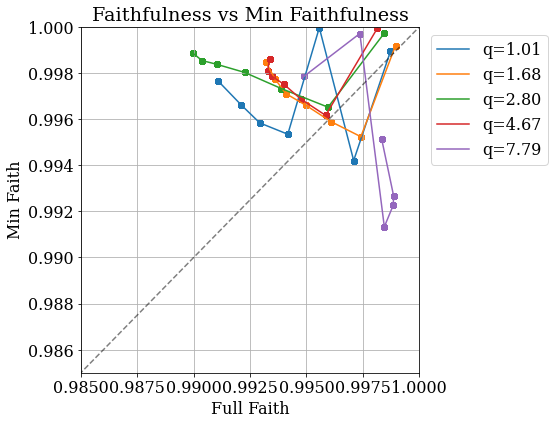

In [46]:
x = df["full_faith"]
xlabel="Full Faith"

y = df["Mc_min_faith"]
ylabel="Min Faith"

title="Faithfulness vs Min Faithfulness"

fig, ax1 = plt.subplots(figsize=(8,6))

for q in q_range[:5]:
    mask_q = (df["q"]< 1.01*q) * (df["q"]>0.99*q)
    ax1.scatter(x[mask_q], y[mask_q])
    ax1.plot(x[mask_q], y[mask_q], label=f"q={q:.2f}")

xx = np.linspace(0, 1, 2)
ax1.plot(xx, xx, linestyle='--', color='k', alpha=0.5)

ax1.set_xlabel(xlabel)
ax1.set_ylabel(ylabel)

ax1.grid(which='both')
ax1.set_xlim(0.985, 1.0)
ax1.set_ylim(0.985, 1.0)

plt.legend(bbox_to_anchor=(1.01, 1), loc='upper left', ncol=1)
plt.tight_layout()
plt.title(title)
plt.show()

# Studying the Inner Product instead of Faithfulness

The complete inner product here is calculated as:

$ \frac{(h_1 | h_2^*)}{\sqrt{h_1 | h_1^*} \sqrt{h_2 | h_2^*}} $,

where each inner product $(a|b)$ is calculated as:
$$ \int_{fmin}^{fmax} \frac{a(f) \cdot b(f)^*}{S_n(f)} df $$


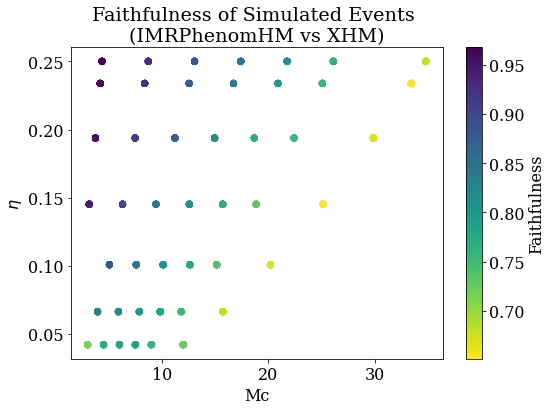

In [34]:
plot_bias_features(df["Mc"]/(1+df["z"]), df["eta"], df["full_inner_prod"], mtot=None, colormap="viridis_r", 
    title="Faithfulness of Simulated Events \n(IMRPhenomHM vs XHM)", xlabel="Mc", ylabel="$\eta$", cbar_label="Faithfulness",  savefig='grid_faith_dist')



In [47]:
q_range = np.unique(np.round(df["q"], 3))

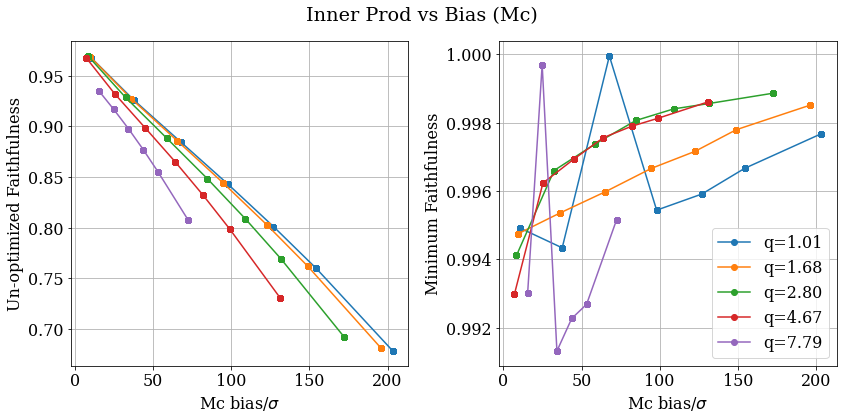

In [48]:
x = df["Mc_full_bias"]/df["Mc_stat_err"]
xlabel="Mc bias/$\sigma$"

y = df["full_inner_prod"]
ylabel="Un-optimized Faithfulness"

y1 = df["Mc_min_inner_prod"]
ylabel1="Minimum Faithfulness"

vmin = np.min(df["full_inner_prod"])
vmax = np.max(df["full_inner_prod"])

title="Inner Prod vs Bias (Mc)"
    
fig, [ax1, ax2] = plt.subplots(nrows=1, ncols=2, figsize=(12,6))

for q in q_range[:5]:
    mask_q = (df["q"]< 1.01*q) * (df["q"]>0.99*q)
    ax1.plot(x[mask_q], y[mask_q], '-o', label=f"q={q:.2f}")

    ax2.plot(x[mask_q], y1[mask_q], '-o', label=f"q={q:.2f}")

ax1.set_xlabel(xlabel)
ax1.set_ylabel(ylabel)
ax1.grid(which='both')
# ax1.set_ylim(vmin, vmax)

ax2.set_xlabel(xlabel)
ax2.set_ylabel(ylabel1)
ax2.grid(which='both')
# ax2.set_ylim(vmin, vmax)

# plt.semilogx()
plt.legend(loc='lower right', ncol=1)
plt.suptitle(title)
plt.tight_layout()
plt.subplots_adjust(top=0.9)

# plt.savefig(plotdir+'inner_prod_requirements.pdf')
plt.show()

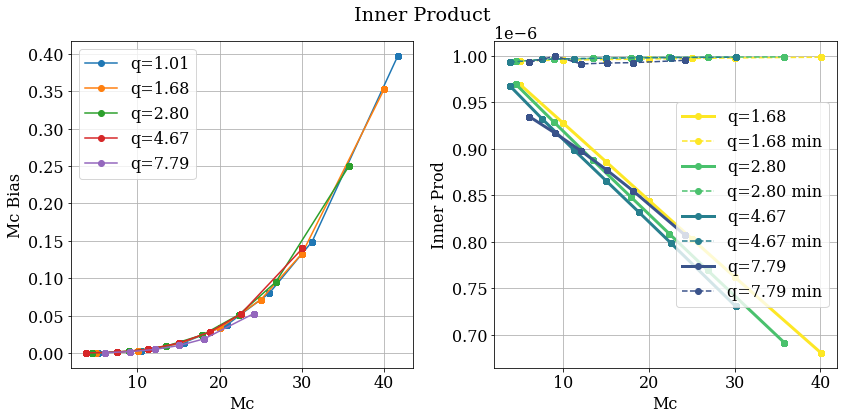

In [49]:
x1 = df["Mc"]
xlabel1="Mc"

x2 = df["inspiral_t"]
xlabel2="Inspiral Time (s)"

y = df["Mc_full_bias"]
ylabel="Mc Bias"

title="Max Lambda for unbiased Mc"


fig, [ax1, ax2] = plt.subplots(nrows=1, ncols=2, figsize=(12,6))

for q in q_range[:5]:
    mask_q = (df["q"]< 1.01*q) * (df["q"]>0.99*q)
    ax1.plot(x1[mask_q], y[mask_q], '-o', label=f"q={q:.2f}")

    
ax1.set_xlabel(xlabel1)
ax1.set_ylabel(ylabel)
ax1.grid(which='both')
ax1.legend()


x1 = df["Mc"]
xlabel1="Mc"

y1 = df["full_inner_prod"]
ylabel1="Inner Prod"

y2 = df["Mc_min_inner_prod"]
ylabel2="Min Inner Prod"

y1 = y1/1e6
y2 = y2/1e6

title="Inner Product"
    

for i, q in enumerate(q_range[1:5]):
    mask_q = (df["q"]< 1.01*q) * (df["q"]>0.99*q)
    ax2.plot(x1[mask_q], y1[mask_q], '-o', lw=3, label=f"q={q:.2f}", color=plt.cm.viridis(2/q))
    ax2.plot(x1[mask_q], y2[mask_q], '--o', label=f"q={q:.2f} min", color=plt.cm.viridis(2/q))

    
ax2.set_xlabel(xlabel1)
ax2.set_ylabel(ylabel1)
ax2.grid(which='both')
ax2.legend()
# ax2.set_xscale('log')


plt.tight_layout()
plt.suptitle(title)
plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()


It appears that the inner product (unoptimized faithfulness) behaves as expected. The inner product required to bring bias below 1 sigma is always higher than the base inner product b/w IMRPhenomD and XAS.

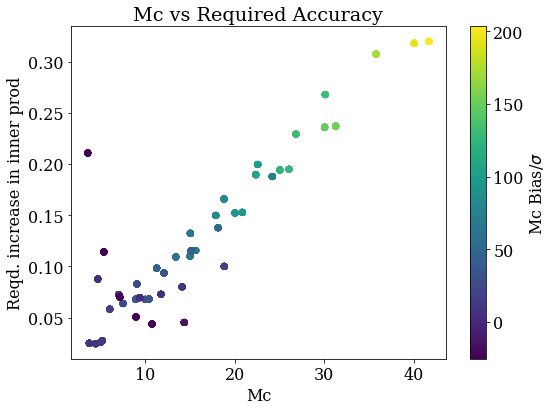

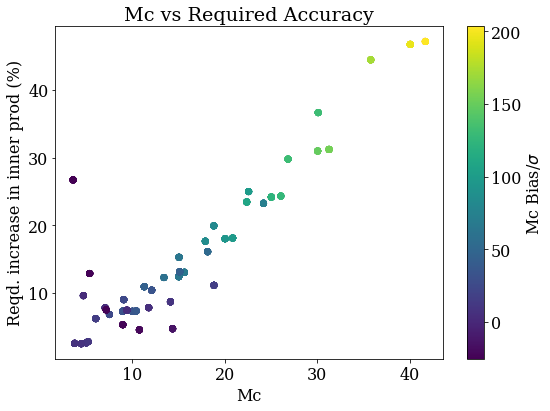

In [50]:
delta_inner_prod = (df["Mc_min_inner_prod"]-df["full_inner_prod"])

plot_bias_features(df["Mc"], delta_inner_prod, df["Mc_full_bias"]/df["Mc_stat_err"], mtot=None, colormap="viridis", 
    title="Mc vs Required Accuracy", xlabel="Mc", ylabel="Reqd. increase in inner prod", cbar_label="Mc Bias/$\sigma$", plt_show=False)


delta_inner_prod_perc = 100*(df["Mc_min_inner_prod"]-df["full_inner_prod"])/df["full_inner_prod"]

plot_bias_features(df["Mc"], delta_inner_prod_perc, df["Mc_full_bias"]/df["Mc_stat_err"], mtot=None, colormap="viridis", 
    title="Mc vs Required Accuracy", xlabel="Mc", ylabel="Reqd. increase in inner prod (%)", cbar_label="Mc Bias/$\sigma$", plt_show=False)

The above plot shows that the percentage increase in inner product required to bring the bias below 1 sigma increases with the bias. Also, it is ALWAYS positive, i.e. the required waveform is indeed closer to the true waveform.

# Grid Plots

/opt/anaconda3/envs/gwbench/lib/python3.7/site-packages/numpy/lib/function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/opt/anaconda3/envs/gwbench/lib/python3.7/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


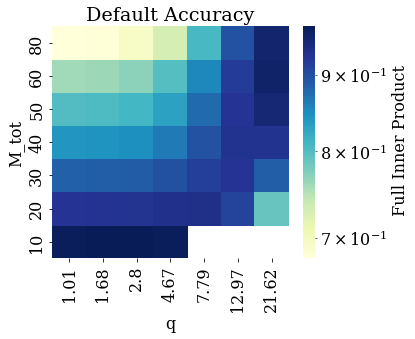

/opt/anaconda3/envs/gwbench/lib/python3.7/site-packages/numpy/lib/function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/opt/anaconda3/envs/gwbench/lib/python3.7/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


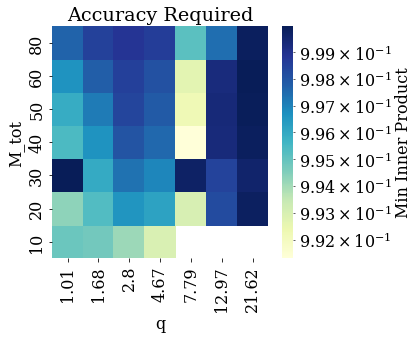

/opt/anaconda3/envs/gwbench/lib/python3.7/site-packages/numpy/lib/function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/opt/anaconda3/envs/gwbench/lib/python3.7/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


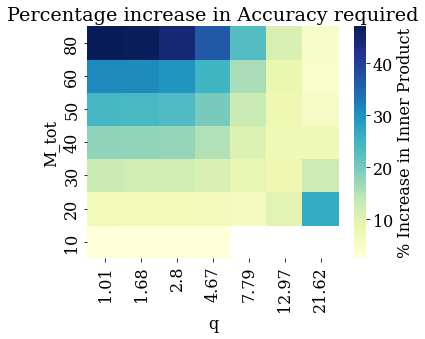

In [51]:
q_range = np.unique(np.round(df["q"], 2))
full_inner_prod_grid = np.zeros((len(mtots),len(q_range)))

vmin = np.min(df["Mc_min_inner_prod"])
vmax = np.max(df["Mc_min_inner_prod"])

z = df["z"].iloc[0]
for i, mtot in enumerate(mtots):
    mask_mtot = (df["M_tot"]< 1.01*(1+z)*mtot) * (df["M_tot"]>0.99*(1+z)*mtot)
    df_mtot = df[mask_mtot]
    for j, q in enumerate(q_range):
        mask_q = (df_mtot["q"]< 1.01*q) * (df_mtot["q"]>0.99*q)
        full_inner_prod_grid[i,j] = np.average(df_mtot[mask_q]["full_inner_prod"])

f, ax= plt.subplots(1, 1,  figsize=(6,5)) 

ax = sns.heatmap(full_inner_prod_grid, cmap="YlGnBu", vmin=vmin, vmax=vmax, norm=LogNorm(), linewidth=0, xticklabels=q_range, yticklabels=mtots, \
                cbar_kws={'label': ' Full Inner Product'})

plt.xlabel("q", fontsize=16)
plt.ylabel('M_tot', fontsize=16)

plt.gca().invert_yaxis()
plt.title("Default Accuracy")
plt.tight_layout()
plt.savefig(plotdir+'inner_prod_default_grid.pdf')

plt.show()



q_range = np.unique(np.round(df["q"], 2))
min_inner_prod_grid = np.zeros((len(mtots),len(q_range)))

z = df["z"].iloc[0]
for i, mtot in enumerate(mtots):
    mask_mtot = (df["M_tot"]< 1.01*(1+z)*mtot) * (df["M_tot"]>0.99*(1+z)*mtot)
    df_mtot = df[mask_mtot]
    for j, q in enumerate(q_range):
        mask_q = (df_mtot["q"]< 1.01*q) * (df_mtot["q"]>0.99*q)
        min_inner_prod_grid[i,j] = np.average(df_mtot[mask_q]["Mc_min_inner_prod"])

f, ax= plt.subplots(1, 1,  figsize=(6,5)) 

ax = sns.heatmap(min_inner_prod_grid, cmap="YlGnBu", vmin=vmin, vmax=vmax, norm=LogNorm(), linewidth=0,xticklabels=q_range, yticklabels=mtots, \
                cbar_kws={'label': 'Min Inner Product'})

plt.xlabel("q", fontsize=16)
plt.ylabel('M_tot', fontsize=16)

plt.gca().invert_yaxis()
plt.title("Accuracy Required")
plt.tight_layout()
plt.savefig(plotdir+'inner_prod_required_grid.pdf')
plt.show()


q_range = np.unique(np.round(df["q"], 2))
inner_prod_delta_grid = np.zeros((len(mtots),len(q_range)))

z = df["z"].iloc[0]
inner_prod_delta = 100*(df["Mc_min_inner_prod"]-df["full_inner_prod"])/df["full_inner_prod"]

for i, mtot in enumerate(mtots):
    mask_mtot = (df["M_tot"]< 1.01*(1+z)*mtot) * (df["M_tot"]>0.99*(1+z)*mtot)
    df_mtot = df[mask_mtot]
    for j, q in enumerate(q_range):
        mask_q = (df_mtot["q"]< 1.01*q) * (df_mtot["q"]>0.99*q)
        inner_prod_delta_grid[i,j] = np.average(inner_prod_delta[mask_mtot][mask_q])


f, ax= plt.subplots(1, 1,  figsize=(6,5)) 

ax = sns.heatmap(inner_prod_delta_grid, cmap="YlGnBu", linewidth=0, xticklabels=q_range, yticklabels=mtots, \
                cbar_kws={'label': '% Increase in Inner Product'})

plt.xlabel("q", fontsize=16)
plt.ylabel('M_tot', fontsize=16)

plt.gca().invert_yaxis()
plt.title("Percentage increase in Accuracy required")
plt.tight_layout()
plt.savefig(plotdir+'percentage_inner_prod_required_grid.pdf')

plt.show()


